# Automobile Data Analysis

This notebook contains detailed steps followed for cleansing, preparing and analysing the automobile data set, inorder to determine the relationshop between car pricing and physical characteristics of the car.
For more details about the dataset and attribute information, [refer here](https://archive.ics.uci.edu/ml/datasets/automobile)

### Hypothesis:

Body style, body size and engine specs play an important role in arriing at the market price of a car. 

This study aims to establish the relationship between the said parameters within the scope of the aailable data. The initial assumption is that aboe factors play a significant role in the price discoery, inspite of market dynamics and its influence. 

In [11]:
import numpy as np
import pandas as pd
from scipy import stats 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read data from CSV file
cars=pd.read_csv("./Automobile_data.txt")

## Data Wrangling

List columns containing non-numeric values where numerics are expected. 

In [12]:
features = cars.columns
for x in features:
    if ('?' in cars[x].unique()) or ('l' in cars[x].unique()):
        ct = cars[cars[x].isin(['?','l'])].shape[0]
        print(x + " - " + str(ct))
        

normalized-losses - 41
num-of-doors - 2
engine-type - 12
bore - 4
stroke - 4
horsepower - 2
peak-rpm - 2
price - 4


/home/justin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


### Cleanse and prepare data for analysis

In [13]:
#Impute number of doors for missing cells
cars.loc[cars['num-of-doors'] == '?', 'num-of-doors'] = 'four'


In [14]:
x=cars.groupby(by='engine-type')['engine-type'].count().reset_index(name='count').sort_values('count', ascending=False).reset_index(drop=True)
cars.loc[cars['engine-type']=='l', 'engine-type'] = x.iloc[0,0]

In [15]:
def calc_num_cylinders(cylstr):
    cyls = {'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12}
    if(cylstr in cyls.keys()):
        return cyls[cylstr]
    return 0

cars['num_cylinders'] = cars['num-of-cylinders'].apply(lambda x: calc_num_cylinders(x))

def calc_num_doors (doorstr):
    if(doorstr == 'two'):
       return 2 
    if (doorstr =='four'):
       return 4
    return 0
       
cars['num_doors'] = cars['num-of-doors'].apply(lambda x: calc_num_doors (x))


In [16]:
cars.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'num_cylinders', 'num_doors'],
      dtype='object')

### Imputing missing Values with nearest Values.
To maintain precision and accuracy while imputing certain values, the mean of relevant groups are used.

In [17]:
#impute a NaN alue in a column with the mean value of the specified group
def impute_groupmean(df,grpby,feature):
    #grpby='body-style'
    #feature = 'horsepower'
    #print(type(df))
    df=df.merge(df.groupby(by=grpby, as_index=False)[feature].mean(), left_on=grpby, right_on=grpby, how="inner", suffixes=['', '_right'])
    df[feature] = np.where(df[feature].isnull(),df[feature+'_right'],df[feature])
    df.drop(feature+'_right', axis=1, inplace=True)
    return df


#
# Update horsepower figures having ? values with mean of the group(body-style)
#
cars['horsepower'] = pd.to_numeric(cars['horsepower'], errors='coerce')
cars=impute_groupmean(cars,'body-style','horsepower')
#Update bore alue
cars['bore'] = pd.to_numeric(cars['bore'], errors='coerce')
cars=impute_groupmean(cars,'num_cylinders','bore')
#Stroke
cars['stroke'] = pd.to_numeric(cars['stroke'], errors='coerce')
cars=impute_groupmean(cars,'num_cylinders','stroke')
#peak-rpm
cars['peak-rpm'] = pd.to_numeric(cars['peak-rpm'], errors='coerce')
cars=impute_groupmean(cars,'num_cylinders','peak-rpm')
#price
cars['price'] = pd.to_numeric(cars['price'], errors='coerce')
cars=impute_groupmean(cars,'body-style','price')


In [18]:
plot_color = "#dd0033"
palette = ["#FFA07A","#FF0000", "#dd0033","#800000","#DB7093"]
figalpha = 0.5
axalpha = 0

left   =  0.10  # the left side of the subplots of the figure
right  =  0.95    # the right side of the subplots of the figure
bottom =  0.2    # the bottom of the subplots of the figure
top    =  0.3    # the top of the subplots of the figure
wspace =  0.1     # the amount of width reserved for blank space between subplots
hspace = 0.1 # the amount of height reserved for white space between subplots
y_title_margin = 1.0 # The amount of space above titles

### Price ranges according to body styles

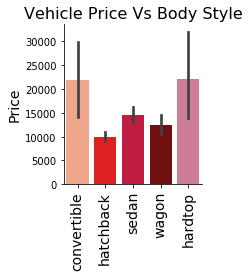

In [69]:
plot_color = "#dd0033"
palette = ["#FFA07A","#FF0000", "#dd0033","#800000","#DB7093"]

gax1=sns.factorplot(x="body-style",y="price", data=cars,kind="bar", palette=palette, hue="body-style", dodge=False,size=4, aspect=1,)

gax1.facet_axis(0,0).set_title("Vehicle Price Vs Body Style", fontsize=16)
gax1.facet_axis(0,0).set_ylabel("Price", fontsize=14)
gax1.facet_axis(0,0).set_xlabel("")
gax1.facet_axis(0,0).patch.set_alpha(axalpha)
gax1.facet_axis(0,0).set_xticklabels(gax1.facet_axis(0,0).get_xticklabels(), rotation=90, fontsize=14)
gax1.fig.patch.set_alpha(figalpha)
#plt.show()
gax1.fig.savefig('./graphs/price_01_price_bodystyle.png',dpi=gax1.fig.dpi,bbox_inches='tight')

Text(0.5,0,'')

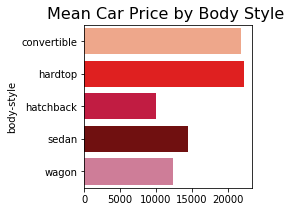

In [76]:
plot_color = "#dd0033"
palette = ["#FFA07A","#FF0000", "#dd0033","#800000","#DB7093"]

fig, ax = plt.subplots(figsize=(3,3), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0)
ax.set_title("Mean Car Price by Body Style ", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

grp1=cars.groupby('body-style')['price'].mean().reset_index()

gax=sns.barplot(y='body-style', x='price', data=grp1, palette=palette, ax=ax)
ax.set_xlabel('Mean Price',fontsize=14 )
ax.set_xlabel('',fontsize=14)
#gax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=14)

[Text(0,0,'convertible'),
 Text(0,0,'hardtop'),
 Text(0,0,'hatchback'),
 Text(0,0,'sedan'),
 Text(0,0,'wagon')]

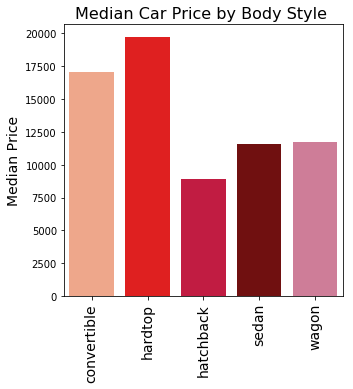

In [38]:
#cars.groupby('body-style')['price'].median()
plot_color = "#dd0033"
palette = ["#FFA07A","#FF0000", "#dd0033","#800000","#DB7093"]

fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Median Car Price by Body Style ", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

grp1=cars.groupby('body-style')['price'].median().reset_index()

gax=sns.barplot(x='body-style', y='price', data=grp1, palette=palette, ax=ax)
ax.set_ylabel('Median Price',fontsize=14 )
ax.set_xlabel('',fontsize=14)
gax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=14)

Performance cars for enthusiasts costs more than all other body styles.

In [8]:
cars['volume']=cars['height']*cars['length']*cars['width']

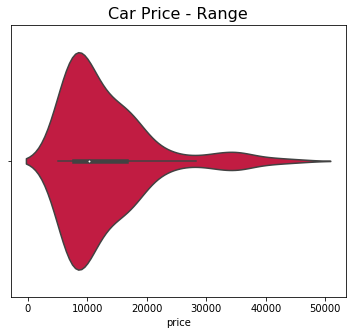

In [50]:
fig, ax = plt.subplots(figsize=(6,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Car Price - Range", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

sns.violinplot(x=cars['price'], color=plot_color)

In [10]:
cars[['num_cylinders','price','wheel-base','length','height','width','engine-size','num_doors','stroke','bore','compression-ratio','horsepower','peak-rpm','curb-weight','city-mpg']].corr()

,num_cylinders,price,wheel-base,length,height,width,engine-size,num_doors,stroke,bore,compression-ratio,horsepower,peak-rpm,curb-weight,city-mpg
num_cylinders,1.000000,0.678631,0.339507,0.430672,-0.013995,0.545007,0.846031,-0.019503,0.008578,0.243553,-0.020002,0.691565,-0.124268,0.609727,-0.445837
price,0.678631,1.000000,0.581379,0.679089,0.137255,0.718420,0.855652,0.046305,0.081341,0.527273,0.072382,0.744076,-0.103981,0.812971,-0.658374
wheel-base,0.339507,0.581379,1.000000,0.874587,0.589435,0.795144,0.569329,0.439635,0.161477,0.490378,0.249786,0.352445,-0.360591,0.776386,-0.470414
length,0.430672,0.679089,0.874587,1.000000,0.491029,0.841118,0.683360,0.385675,0.129739,0.607480,0.158414,0.553822,-0.287134,0.877728,-0.670909
height,-0.013995,0.137255,0.589435,0.491029,1.000000,0.279210,0.067149,0.540286,-0.056999,0.176195,0.261214,-0.110137,-0.320510,0.295572,-0.048640
width,0.545007,0.718420,0.795144,0.841118,0.279210,1.000000,0.735433,0.197735,0.182956,0.559204,0.181129,0.641805,-0.219934,0.867032,-0.642704
engine-size,0.846031,0.855652,0.569329,0.683360,0.067149,0.735433,1.000000,0.013919,0.206675,0.594090,0.028971,0.810505,-0.244630,0.850594,-0.653658
num_doors,-0.019503,0.046305,0.439635,0.385675,0.540286,0.197735,0.013919,1.000000,-0.006983,0.109945,0.171797,-0.128466,-0.240264,0.190720,-0.014271
stroke,0.008578,0.081341,0.161477,0.129739,-0.056999,0.182956,0.206675,-0.006983,1.000000,-0.055909,0.186170,0.085985,-0.069751,0.168929,-0.042906
bore,0.243553,0.527273,0.490378,0.607480,0.176195,0.559204,0.594090,0.109945,-0.055909,1.000000,0.005203,0.576017,-0.263912,0.649045,-0.594584


/home/justin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


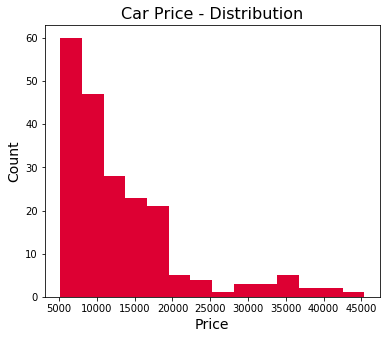

In [20]:
fig, ax = plt.subplots(figsize=(6,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Car Price - Distribution", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax2=sns.distplot(cars["price"], kde=False, ax=ax, color=plot_color, hist_kws=dict(alpha=1))
gax2.set_ylabel('Count',fontsize=14 )
gax2.set_xlabel('Price',fontsize=14)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.savefig('./graphs/price_02_price_dist.png',dpi=fig.dpi,bbox_inches='tight')

In [ ]:
Majority of cars belong to the lower price brackets (< 20K) een though there are cars that go upto 45K

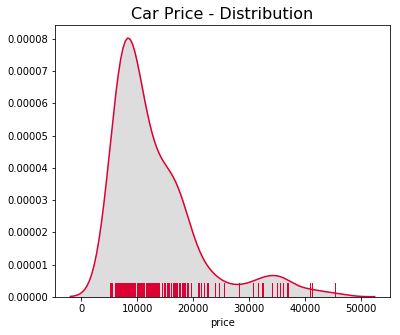

In [26]:
fig, ax = plt.subplots(figsize=(6,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0)
ax.set_title("Car Price - Distribution", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

ax=sns.distplot(cars['price'],hist=False,rug=True,norm_hist=True, color=plot_color,ax=ax)

# Get the two lines from the axes to generate shading
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
ax.fill_between(x1,y1, color="#dddddd", alpha=1)


## Engine specifications and Price

### 1. Engine Size

/home/justin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


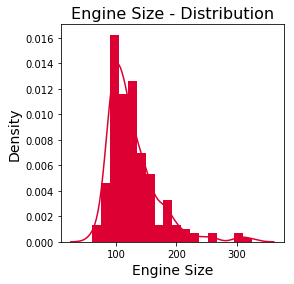

In [52]:
fig, ax = plt.subplots(figsize=(4,4), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Engine Size - Distribution", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax3=sns.distplot(cars["engine-size"], kde=True,ax=ax, color=plot_color, hist_kws=dict(alpha=1))
gax3.set_ylabel('Density',fontsize=14 )
gax3.set_xlabel('Engine Size',fontsize=14)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.savefig('./graphs/enginesize_01_dist.png',dpi=fig.dpi,bbox_inches='tight')


In [13]:
cars['engine-size'].describe()

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: engine-size, dtype: float64

In [ ]:
Right skewed engine size distribution. Majority of cars utilise smaller engines. 


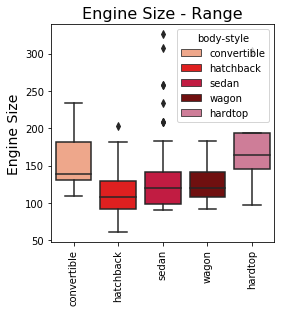

In [56]:
fig, ax = plt.subplots(figsize=(4,4), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Engine Size - Range", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax4=sns.boxplot(x="body-style",y="engine-size",data=cars, palette=palette, hue="body-style", dodge=False, ax=ax)

gax4.set_ylabel('Engine Size',fontsize=14 )
gax4.set_xlabel('',fontsize=14)
gax4.set_xticklabels(gax4.get_xticklabels(), rotation=90)
fig.savefig('./graphs/enginesize_02_range.png',dpi=fig.dpi,bbox_inches='tight')

In [21]:
cars[['make','body-style','engine-size','num_cylinders']].sort_values('engine-size', ascending=False).head()

,make,body-style,engine-size,num_cylinders
171,jaguar,sedan,326,12
150,mercedes-benz,sedan,308,8
201,mercedes-benz,hardtop,304,8
158,jaguar,sedan,258,6
157,jaguar,sedan,258,6


There are a few engines that shows up as outliers. But then those are 12 cylinder and 8 cylinder engines, for which these engine sizes seem relaistic. So, they cannot be dismissed as outliers, even though, technically, these are classified outliers.

In [63]:
cars[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.855652
price,0.855652,1.000000


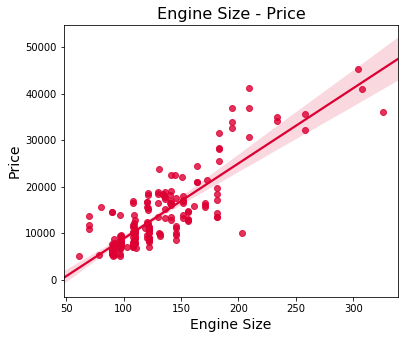

In [134]:
fig, ax = plt.subplots(figsize=(6,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Engine Size - Price", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax5=sns.regplot("engine-size",'price', data=cars, color=plot_color, ax=ax)
gax5.set_ylabel('Price',fontsize=14 )
gax5.set_xlabel('Engine Size',fontsize=14)
#gax5.set_xticklabels(gax5.get_xticklabels(), rotation=90)
fig.savefig('./graphs/enginesize_02_price.png',dpi=fig.dpi,bbox_inches='tight')

### 2. Horsepower

/home/justin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


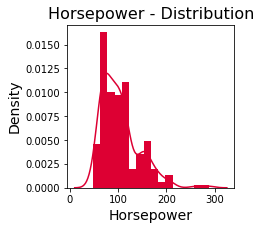

In [59]:
fig, ax = plt.subplots(figsize=(3,3), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Horsepower - Distribution", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax6=sns.distplot(cars['horsepower'],kde=True, ax=ax, color=plot_color, hist_kws=dict(alpha=1))

gax6.set_ylabel('Density',fontsize=14 )
gax6.set_xlabel('Horsepower',fontsize=14)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.savefig('./graphs/horsepower_01_dist.png',dpi=fig.dpi,bbox_inches='tight')



In [16]:
cars['horsepower'].describe()

count    205.000000
mean     104.210163
std       39.522339
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

HorsePower is also right skewed. Majority cars have lower power output compared to the mean horsepower of the dataset.

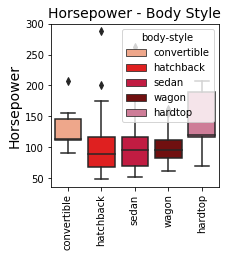

In [58]:
fig, ax = plt.subplots(figsize=(3,3), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Horsepower - Body Style", y = y_title_margin, fontsize=14)
ax.patch.set_alpha(0)

gax7=sns.boxplot(x="body-style", y="horsepower", data=cars, palette=palette, hue="body-style",dodge=False)
gax7.set_ylabel('Horsepower',fontsize=14 )
gax7.set_xlabel('',fontsize=14)
gax7.set_xticklabels(gax7.get_xticklabels(), rotation=90)
fig.savefig('./graphs/horsepower_02_range.png',dpi=fig.dpi,bbox_inches='tight')


In [23]:
cars[['make','body-style','engine-size','num_cylinders','horsepower']].sort_values('horsepower', ascending=False).head()

,make,body-style,engine-size,num_cylinders,horsepower
63,porsche,hatchback,203,8,288.0
171,jaguar,sedan,326,12,262.0
5,porsche,convertible,194,6,207.0
203,porsche,hardtop,194,6,207.0
202,porsche,hardtop,194,6,207.0


Again these outlier horsepower alues are from 8 cylinder and 12 cylinder engines.

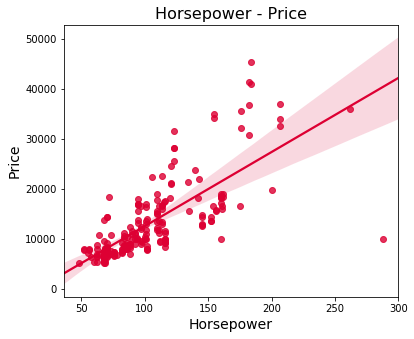

In [60]:
fig, ax = plt.subplots(figsize=(6,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Horsepower - Price", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax8=sns.regplot("horsepower",'price', data=cars, color=plot_color)
gax8.set_ylabel('Price',fontsize=14 )
gax8.set_xlabel('Horsepower',fontsize=14)
#gax8.set_xticklabels(gax8.get_xticklabels(), rotation=90)
fig.savefig('./graphs/horsepower_02_price.png',dpi=fig.dpi,bbox_inches='tight')

### 2.1 Power2Weight ratio

In [39]:
cars['power2weight'] = cars['horsepower']/cars['curb-weight']

In [64]:
cars[['power2weight','price']].corr()

,power2weight,price
power2weight,1.000000,0.468071
price,0.468071,1.000000


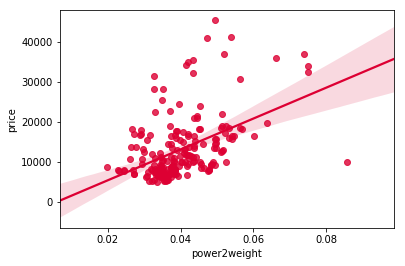

In [40]:
sns.regplot("power2weight",'price', data=cars, color=plot_color)

### 3. Fuel Efficiency

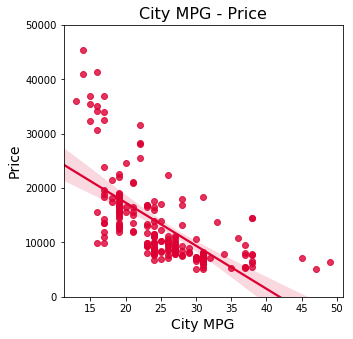

In [144]:
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("City MPG - Price", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax9=sns.regplot(x='city-mpg', y='price',data=cars,color=plot_color)
gax9.set_ylabel('Price',fontsize=14 )
gax9.set_xlabel('City MPG',fontsize=14)
#gax9.set_xticklabels(gax9.get_xticklabels(), rotation=90)
gax9.set_ylim(0,50000)
fig.savefig('./graphs/cityMPG_02_price.png',dpi=fig.dpi,bbox_inches='tight')


In [65]:
cars[['city-mpg','price']].corr()

,city-mpg,price
city-mpg,1.000000,-0.658374
price,-0.658374,1.000000


Fuel Efficiency has a negatiVe correlation with price. People who look for highly fuel efficient car will normally be budget conscious. Hence it is probable that those cars are made for lower price brackets.  

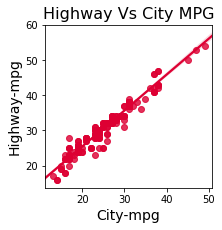

In [62]:
fig, ax = plt.subplots(figsize=(3,3), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Highway Vs City MPG", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax=sns.regplot("city-mpg",'highway-mpg', data=cars, color=plot_color)
gax.set_ylabel('Highway-mpg',fontsize=14 )
gax.set_xlabel('City-mpg',fontsize=14)
#gax.set_xticklabels(gax.get_xticklabels(), rotation=90)
fig.savefig('./graphs/highwaympg_01_citympg.png',dpi=fig.dpi,bbox_inches='tight')


In [66]:
cars[["city-mpg",'highway-mpg']].corr()

,city-mpg,highway-mpg
city-mpg,1.000000,0.971337
highway-mpg,0.971337,1.000000


city-mpg and highway-mpg are strongly correlated. For the purpose of comparison, we can use city-mpg as a realistic figure. 

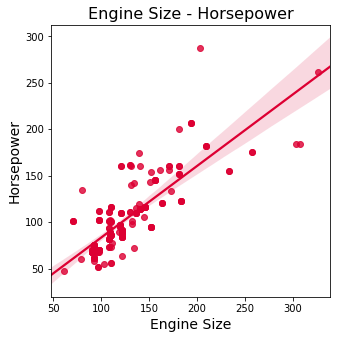

In [147]:
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Engine Size - Horsepower", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)
gax=sns.regplot("engine-size",'horsepower', data=cars, color=plot_color, order=1)

gax.set_ylabel('Horsepower',fontsize=14 )
gax.set_xlabel('Engine Size',fontsize=14)
#gax.set_xticklabels(gax.get_xticklabels(), rotation=90)
fig.savefig('./graphs/enginesize_02_horsepower.png',dpi=fig.dpi,bbox_inches='tight')


In [67]:
cars[["engine-size",'horsepower']].corr()

,engine-size,horsepower
engine-size,1.000000,0.810505
horsepower,0.810505,1.000000


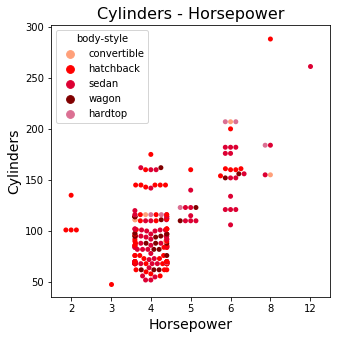

In [12]:
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Cylinders - Horsepower", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax=sns.swarmplot("num_cylinders",'horsepower', data=cars, palette=palette, hue="body-style")

gax.set_ylabel('Cylinders',fontsize=14 )
gax.set_xlabel('Horsepower',fontsize=14)
#gax.set_xticklabels(gax.get_xticklabels(), rotation=90)
fig.savefig('./graphs/cylinder_01_horsepower.png',dpi=fig.dpi,bbox_inches='tight')

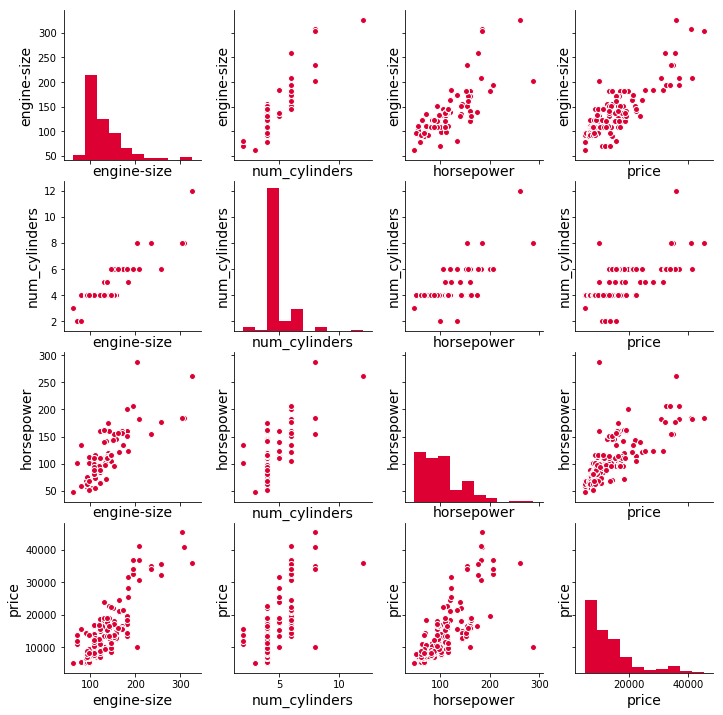

In [21]:
gplt= sns.pairplot(cars[['make','body-style','engine-size','num_cylinders','horsepower', 'price']], kind='scatter', diag_kind='hist',diag_kws=dict(color=plot_color, linewidth=1),plot_kws=dict(color=plot_color))

xlabels,ylabels = [],[]
gplt.fig.patch.set_alpha(figalpha)

for ax in gplt.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in gplt.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        gplt.axes[j,i].patch.set_alpha(0)
        gplt.axes[j,i].xaxis.set_label_text(xlabels[i], fontsize=14)
        gplt.axes[j,i].yaxis.set_label_text(ylabels[j], fontsize=14)

#dir(gplt)       
gplt.fig.savefig('./graphs/pairplot_enginespecs.png',dpi=fig.dpi,bbox_inches='tight')

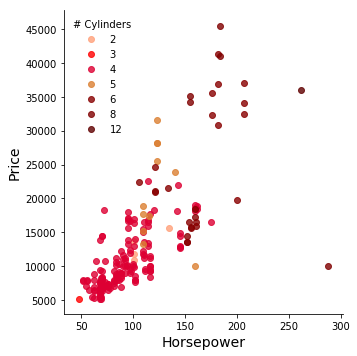

In [71]:
palette = ["#FFA07A","#FF0000", "#dd0033","#DB8033", "#880000", "#800000", "#600000"]
ax.set_title("Price - Horsepower", y = y_title_margin, fontsize=16)
gax=sns.lmplot(x="horsepower",y='price', data=cars,fit_reg=False, palette=palette, hue="num_cylinders",legend=False)
gax.facet_axis(0,0).patch.set_alpha(0)
gax.fig.patch.set_alpha(0)

gax.set_ylabels('Price',fontsize=14 )
gax.set_xlabels('Horsepower',fontsize=14)
gax.facet_axis(0,0).legend(loc="best",framealpha=0, title="# Cylinders")
#gax.fig.savefig('./graphs/horsepower_03_price.png',dpi=fig.dpi,bbox_inches='tight')



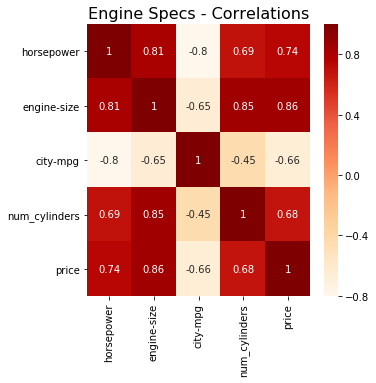

In [111]:
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Engine Specs - Correlations", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

sns.heatmap(cars[['horsepower', 'engine-size','city-mpg','num_cylinders','price']].corr(),cmap="OrRd",annot=True, ax=ax)
fig.savefig('./graphs/enginespecs_heatmap.png',dpi=fig.dpi,bbox_inches='tight')

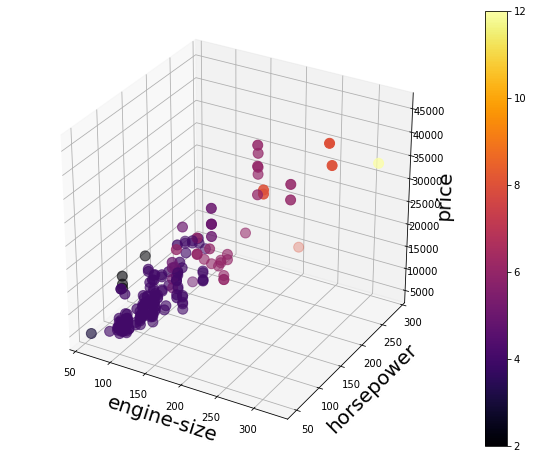

In [63]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pylab 

fig = plt.figure(figsize=(10,8))
fig.patch.set_alpha(0.5)

ax = fig.add_subplot(111, projection='3d')
ax.patch.set_alpha(0)

x = cars['engine-size']
y = cars['horsepower']
z = cars['price']
color = cars['num_cylinders']


cb1=ax.scatter(x, y, z, c=color, cmap=plt.cm.get_cmap('inferno'),s=100)
plt.colorbar(cb1, ax=ax)
ax.set_xlabel('engine-size',fontsize=20)
ax.set_ylabel('horsepower',fontsize=20)
ax.set_zlabel('price',fontsize=20)

fig.savefig('./graphs/enginespecs_price_3d.png',dpi=fig.dpi,bbox_inches='tight')
#plt.show()



### 4. Engine Technology 

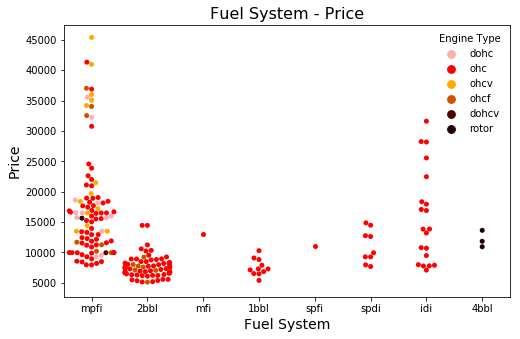

In [91]:
palette = ["#FFADAF","#FF0000", "#ffAA00","#D05000", "#500000", "#200000"]
fig, ax = plt.subplots(figsize=(8,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Fuel System - Price", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax=sns.swarmplot(x="fuel-system",y="price",data=cars, hue="engine-type", ax=ax, palette = palette)

gax.set_ylabel('Price',fontsize=14 )
gax.set_xlabel('Fuel System',fontsize=14)

gax.legend(loc="best",framealpha=0, title="Engine Type")
fig.savefig('./graphs/fuelsystem_price.png',dpi=fig.dpi,bbox_inches='tight')

#dir(gax)

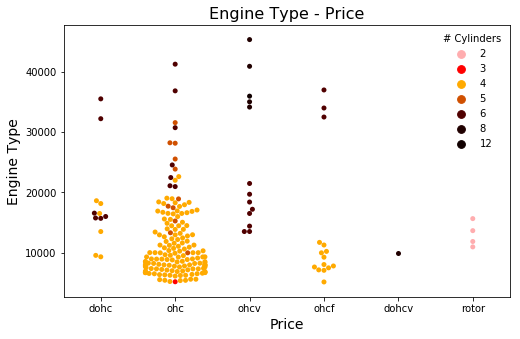

In [92]:
palette = ["#FFADAF","#FF0000", "#ffAA00","#D05000", "#500000", "#200000", "#100000"]
fig, ax = plt.subplots(figsize=(8,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Engine Type - Price", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax=sns.swarmplot(x="engine-type",y="price",data=cars, hue="num_cylinders", palette=palette, ax=ax)

gax.set_ylabel('Engine Type',fontsize=14 )
gax.set_xlabel('Price',fontsize=14)

gax.legend(loc="best",framealpha=0, title="# Cylinders")
fig.savefig('./graphs/enginetype_price.png',dpi=fig.dpi,bbox_inches='tight')


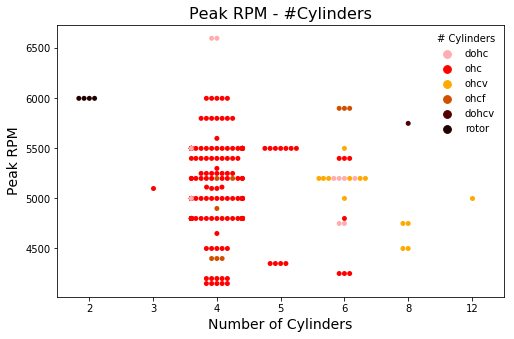

In [93]:
palette = ["#FFADAF","#FF0000", "#ffAA00","#D05000", "#500000", "#200000", "#100000"]
fig, ax = plt.subplots(figsize=(8,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Peak RPM - #Cylinders", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax=sns.swarmplot(x="num_cylinders",y="peak-rpm", hue="engine-type", data=cars,ax=ax,palette=palette)

gax.set_ylabel('Peak RPM',fontsize=14 )
gax.set_xlabel('Number of Cylinders',fontsize=14)

gax.legend(loc="best",framealpha=0, title="# Cylinders")
fig.savefig('./graphs/peakrpm_cylinders.png',dpi=fig.dpi,bbox_inches='tight')

OHCV (oerhead cam ValVe) uses push rods and rocker arms to control ValVe timings. THis makes it less suitable for high rpm engines, but better suited for large torque engines, haing 8 or more cylinders.
OHC is a proen technology and is used for a large number of engines.

## Body Size

### Calculate Shadow Square Footage and classify ehicles by size
**Ref**:https://en.wikipedia.org/wiki/Car_classification
*US Insurance Institute for Highway Safety | Highway Loss Data Institute 'Guide to car size groups' (includes minivans)*

In [41]:
cars['shadowarea'] = cars['length']*cars['width']/144 #Length x Width of ehicle conerted to sq.ft.

def calc_sizegroup(x):
    #print(str(x[0]) + ' ' + str(x[1]))
    if (x[0] > 1400 and x[0] < 2000):
        if(x[1] < 70.0): return 'Mini'
        if(x[1] >= 70.0 and x[1] <= 80.0): return 'Mini'
        if(x[1] >= 81.0 and x[1] <= 110.0): return 'Small'
        if(x[1] > 110 ): return 'Midsize'
        
    if (x[0] > 2000 and x[0] < 2501):
        if(x[1] < 70.0): return 'Mini'
        if(x[1] >= 70.0 and x[1] <= 80.0): return 'Mini'
        if(x[1] >= 81.0 and x[1] <= 110.0): return 'Small'
        if(x[1] > 110 ): return 'Midsize'
    if(x[0] > 2500 and x[0] < 3001):
        if(x[1] >= 70.0 and x[1] <= 90.0): return 'Small'
        if(x[1] > 90.0 ): return 'Midsize'
    if(x[0] > 3001 and x[0] < 3500):
        if(x[1] >= 70.0 and x[1] <= 80.0): return 'Small'
        if(x[1] > 80.0 and x[1] <= 100.0): return 'Midsize'
        if(x[1] > 100 ): return 'Large'
    if(x[0] > 3500 and x[0] < 4000):    
        if(x[1] >= 70.0 and x[1] <= 80.0): return 'Small'
        if(x[1] >= 81.0 and x[1] <= 90.0): return 'Midsize'
        if(x[1] >= 91.0 and x[1] <= 110.0): return 'Large'
        if(x[1] >= 110.0 ): return 'Very Large'
    if(x[0] > 4000 ):    
        if(x[1] >= 70.0 and x[1] <= 90.0): return 'Midsize'
        if(x[1] >= 91.0 and x[1] <= 100.0): return 'Large'
        if(x[1] >= 101.0 ): return 'Very Large'
        
        
        
#test = cars[['curb-weight', 'shadowarea']].head()

cars['sizegroup'] = cars[['curb-weight', 'shadowarea']].apply(lambda x: calc_sizegroup(x), axis=1 )   

#cars[cars['sizegroup'].isnull()][['curb-weight','shadowarea']]

### 1. Length, Width, Height and Price

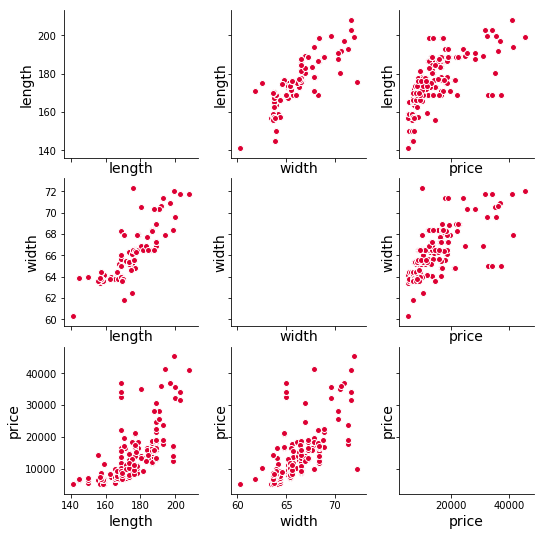

In [39]:
gplt=sns.pairplot(cars[['length','width','price']], kind="scatter",diag_kind='scatter',diag_kws=dict(color=plot_color, linewidth=1),plot_kws=dict(color=plot_color))

xlabels,ylabels = [],[]
gplt.fig.patch.set_alpha(figalpha)

for ax in gplt.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in gplt.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        gplt.axes[j,i].patch.set_alpha(0)
        gplt.axes[j,i].xaxis.set_label_text(xlabels[i], fontsize=14)
        gplt.axes[j,i].yaxis.set_label_text(ylabels[j], fontsize=14)

#dir(gplt)       
gplt.fig.savefig('./graphs/pairplot_bodysize.png',dpi=fig.dpi,bbox_inches='tight')

In [47]:
cars["sizegroup"].value_counts()

Mini       99
Small      57
Midsize    39
Large      10
Name: sizegroup, dtype: int64

Text(0.5,0,'Car Size')

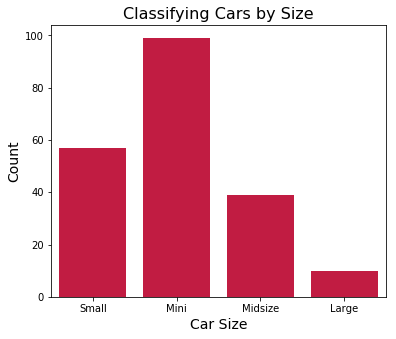

In [49]:
fig, ax = plt.subplots(figsize=(6,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Classifying Cars by Size", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax3=sns.countplot(cars["sizegroup"], ax=ax, color=plot_color)
gax3.set_ylabel('Count',fontsize=14 )
gax3.set_xlabel('Car Size',fontsize=14)


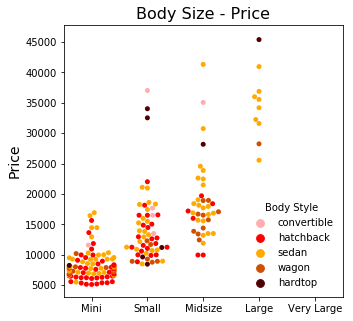

In [73]:
palette = ["#FFADAF","#FF0000", "#ffAA00","#D05000", "#500000", "#200000", "#100000"]

fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0)
ax.set_title("Body Size - Price", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax=sns.swarmplot("sizegroup",'price', data=cars, hue="body-style", order=['Mini','Small','Midsize', 'Large', 'Very Large'],palette=palette, ax=ax)

gax.set_ylabel('Price',fontsize=14 )
gax.set_xlabel('',fontsize=14)
gax.legend(loc="best",framealpha=0, title="Body Style")
#gax.set_xticklabels(gax.get_xticklabels(), rotation=90)
fig.savefig('./graphs/bodysize_price.png',dpi=fig.dpi,bbox_inches='tight')

### DriVe wheels

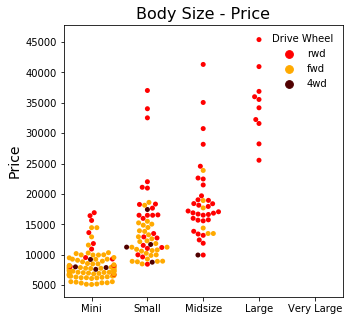

In [104]:
cars['drwheel'] = cars['drive-wheels'].map({"rwd": 1, "fwd": 2, "4wd": 3})

palette = ["#FF0000", "#ffAA00", "#500000", "#200000", "#100000"]

fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Body Size - Price", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax=sns.swarmplot(x="sizegroup",y="price",hue="drive-wheels",data=cars,order=['Mini','Small','Midsize', 'Large', 'Very Large'], palette=palette, ax=ax)

gax.set_ylabel('Price',fontsize=14 )
gax.set_xlabel('',fontsize=14)
gax.legend(loc="best",framealpha=0, title="Drive Wheel")
#gax.set_xticklabels(gax.get_xticklabels(), rotation=90)
fig.savefig('./graphs/bodysize_price_drive.png',dpi=fig.dpi,bbox_inches='tight')


Majority of large cars are rearwheel dries and are priced higher.

### Summarize Engine parameters W.r.t Price. 
Calculate price brakcets 

In [65]:
#cars.groupby(by=['engine-size'])

def categ_price_bracket(x):
    if(x < 10000): return '< 10k'
    if(x < 20000): return '< 20k'
    if(x < 30000): return '< 30k'
    if(x < 40000): return '< 40k'
    if(x < 50000): return '< 50k'

cars['pricebracket'] = cars['price'].apply(lambda x: categ_price_bracket(x))
enginesummary=cars.groupby(by='pricebracket', as_index=False)['engine-size','horsepower','city-mpg'].mean()
enginesummary=enginesummary.melt('pricebracket', var_name='cols',  value_name='vals')
#enginesummary

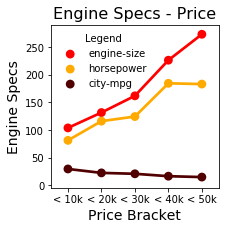

In [66]:
palette = ["#FF0000", "#ffAA00", "#500000", "#200000", "#100000"]

fig, ax = plt.subplots(figsize=(3,3), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Engine Specs - Price", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax=sns.pointplot(x='pricebracket', y='vals', hue='cols',data=enginesummary, palette=palette)

gax.set_ylabel('Engine Specs',fontsize=14 )
gax.set_xlabel('Price Bracket',fontsize=14)
gax.legend(loc="best",framealpha=0, title="Legend")
#gax.set_xticklabels(gax.get_xticklabels(), rotation=90)
fig.savefig('./graphs/enginespecs_pricebracket.png',dpi=fig.dpi,bbox_inches='tight')


body-style, num_cylinders,sizegroup - need indiidual plots because they are categorical.